<a href="https://colab.research.google.com/github/jonathanwise123/Sales_Performance_Analysis/blob/main/CAMSFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/ecommerce_nigeria_dataset_binary_success .csv")

In [4]:
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1


In [5]:
df.tail()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
95,96,Kaduna,7/1/2024,5,Female,57,4705773,99,Bank Transfer,Desktop,Groceries,31593,0
96,97,Cross River,2/17/2024,3,Female,47,1765514,80,Credit Card,Desktop,Groceries,33686,0
97,98,Anambra,5/10/2024,21,Female,41,1019034,17,Credit Card,Mobile,Electronics,21220,0
98,99,Enugu,11/4/2023,0,Male,23,4279261,77,Online payment,Tablet,Groceries,33595,0
99,100,Abuja,5/17/2024,4,Male,45,1368236,49,Online payment,Desktop,Fashion,2518,1


In [6]:
df.isnull().sum()

CustomerID                  0
Location                    0
Date                        0
Transaction Hour            0
Gender                      0
Age                         0
Annual Income (NGN)         0
Spending Score              0
Payment Method              0
Device Used                 0
Product Category            0
Transaction Amount (NGN)    0
Is Payment Successful       0
dtype: int64

In [7]:
df.describe()

,CustomerID,Transaction Hour,Age,Annual Income (NGN),Spending Score,Transaction Amount (NGN),Is Payment Successful
count,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.00000
mean,50.500000,11.040000,38.61000,3.856410e+06,54.310000,26277.990000,0.43000
std,29.011492,7.143437,12.37617,1.831768e+06,28.758379,13506.838016,0.49757
min,1.000000,0.000000,18.00000,8.154720e+05,3.000000,2518.000000,0.00000
25%,25.750000,4.000000,27.00000,2.114703e+06,31.250000,14703.750000,0.00000
50%,50.500000,11.000000,39.50000,4.199254e+06,50.500000,27371.500000,0.00000
75%,75.250000,18.000000,47.50000,5.445154e+06,83.000000,38571.000000,1.00000
max,100.000000,23.000000,60.00000,6.983119e+06,100.000000,49116.000000,1.00000


<Axes: xlabel='Spending Score', ylabel='Density'>

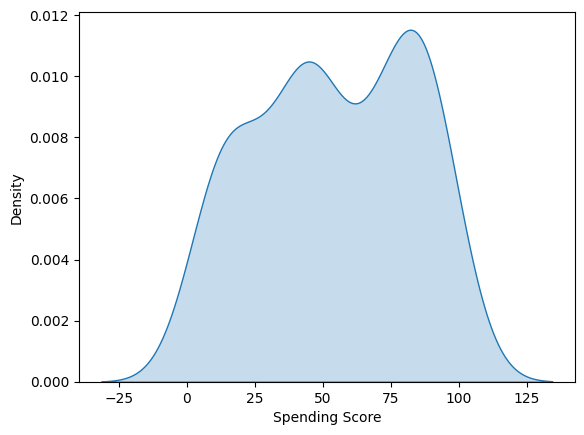

In [15]:
sns.kdeplot(df['Spending Score'], shade = True)

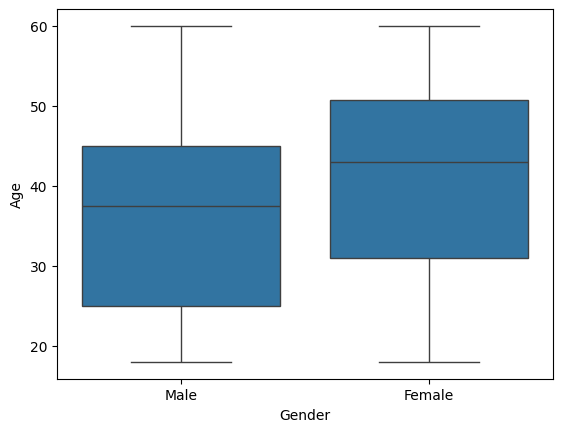

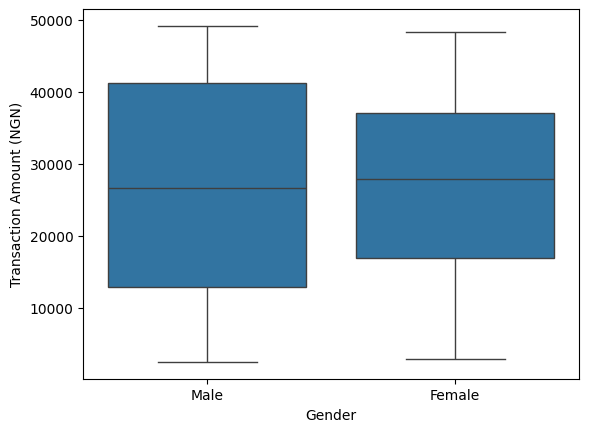

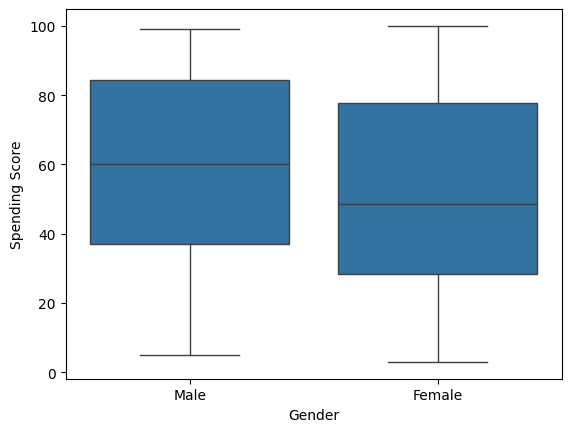

In [14]:
columns = ['Age', 'Transaction Amount (NGN)','Spending Score']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [19]:
df['Gender'].value_counts()

Gender
Female    54
Male      46
Name: count, dtype: int64

In [20]:
#Bivariate Analysis

<Axes: xlabel='Transaction Amount (NGN)', ylabel='Spending Score'>

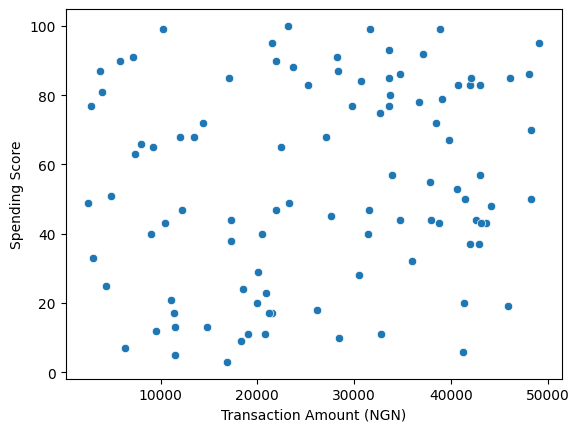

In [21]:
sns.scatterplot(data=df, x='Transaction Amount (NGN)',y='Spending Score' )

In [29]:
df.groupby(['Gender'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score']].mean()

,Age,Transaction Amount (NGN),Spending Score
Gender,,,
Female,40.814815,25894.370370,51.740741
Male,36.021739,26728.326087,57.326087


In [31]:
selected_columns = ['Age', 'Transaction Amount (NGN)','Spending Score']

# Create a new DataFrame with only the selected columns
selected_data = df[selected_columns]

# Compute the correlation
correlation= selected_data.corr()

# Display the correlation matrix
print(correlation)

                               Age  Transaction Amount (NGN)  Spending Score
Age                       1.000000                  0.049385       -0.063228
Transaction Amount (NGN)  0.049385                  1.000000        0.181395
Spending Score           -0.063228                  0.181395        1.000000


In [ ]:
sns.heatmap(df.corr(),annot= True, cmap= )